In [ ]:
import cv2
import glob
import numpy as np
from sklearn.preprocessing import normalize
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/photometric_stereo/hippo

Ierr.log	      LightProbe-1  ManualData	refined_light.txt
light_directions.txt  LightProbe-2  Objects	result.mat


In [ ]:
img = 'hippo'
light = np.loadtxt(f'/content/drive/MyDrive/photometric_stereo/{img}/light_directions.txt')
light, light.shape

(array([[-3.50853298e-01, -3.28731979e-01, -2.86363073e-01,
         -3.26085918e-01, -3.20314177e-01, -1.48529273e-01,
         -1.41805209e-01, -1.45351028e-01, -1.48676158e-01,
         -1.17701924e-01,  1.48296368e-01,  1.85425304e-01,
          1.76503385e-01,  1.83645638e-01,  1.58561019e-01,
          3.39394966e-01,  3.47991934e-01,  4.30194121e-01,
          4.17691709e-01,  4.43409540e-01],
        [ 5.35611595e-01,  3.99303561e-01,  1.46918899e-01,
         -1.92350752e-03, -1.97946525e-01,  3.96369438e-01,
          2.81259719e-01, -4.43176619e-02, -2.18850873e-01,
         -3.84562144e-01,  3.84437598e-01,  2.54002278e-01,
          1.87391645e-04, -2.28891986e-01, -3.87970425e-01,
          5.97435234e-01,  5.13990377e-01,  2.98754436e-01,
          7.48335643e-02, -5.15490792e-02],
        [ 7.68129014e-01,  8.55857437e-01,  9.46789854e-01,
          9.45338180e-01,  9.26399483e-01,  9.05996867e-01,
          9.49096546e-01,  9.88387082e-01,  9.64364918e-01,
          9.

In [ ]:
folder_name = f'/content/drive/MyDrive/photometric_stereo/{img}/Objects/'
ext = "png"
file_list = sorted(glob.glob(folder_name + "*." +ext))
print(file_list)

['/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_01.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_02.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_03.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_04.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_05.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_06.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_07.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_08.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_09.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_10.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_11.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_12.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_13.png', '/content/drive/MyDrive/photometric_stereo/hippo/Objects/Image_

In [ ]:
I = None
height = 0
width =0
for file_name in file_list:
  im =  cv2.imread(file_name).astype(np.float64)
  im = np.mean(im, axis=2)
  height, width = im.shape
  if I is None:
    I = im.reshape((-1,1))
  else:
    I = np.append(I, im.reshape(-1, 1), axis = 1)
I, I.shape, height, width

(array([[3., 6., 8., ..., 7., 7., 6.],
        [4., 7., 8., ..., 7., 8., 6.],
        [3., 6., 8., ..., 7., 8., 6.],
        ...,
        [1., 1., 2., ..., 1., 1., 1.],
        [1., 1., 2., ..., 4., 2., 2.],
        [1., 1., 1., ..., 3., 2., 2.]]),
 (336400, 20),
 580,
 580)

In [ ]:
N = np.linalg.lstsq(light.T, I.T, rcond=None)[0].T
N_norm = normalize(N, axis = 1)
# N_norm = N
N_norm.shape, N_norm

((336400, 3),
 array([[ 0.1926638 ,  0.8077813 ,  0.55710863],
        [ 0.17324216,  0.82693197,  0.53494922],
        [ 0.23381363,  0.80484968,  0.54547976],
        ...,
        [-0.39993172, -0.24591121,  0.88293958],
        [ 0.61861094,  0.48528793,  0.61791272],
        [ 0.39220345,  0.43287199,  0.8116639 ]]))

In [ ]:
albedo = np.linalg.norm(N,axis = 1)
albedo, albedo.shape

(array([8.94458091, 9.5476484 , 9.25332242, ..., 1.85085438, 3.25115486,
        2.22582513]),
 (336400,))

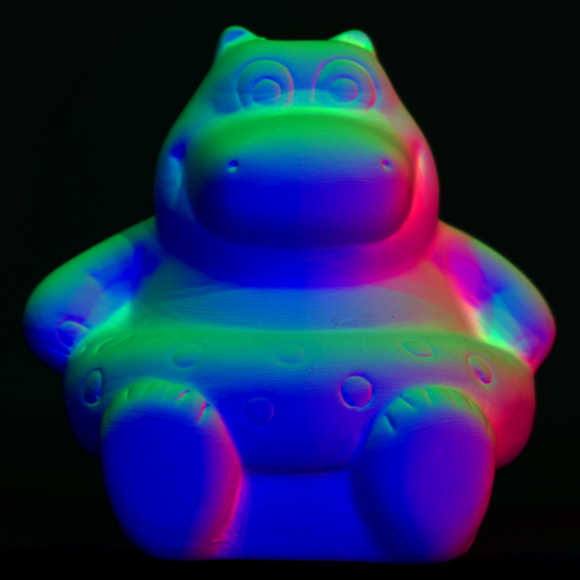

In [ ]:
normal_map = np.reshape(N_norm, (height, width, 3))
temp = normal_map[:, :, 0].copy()
normal_map[:, :, 0] =normal_map[:, :, 2]
normal_map[:,:, 2] = temp
cv2_imshow( normal_map)